# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2021/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday October the 31st, 2021 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/


(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

### Overview

This year's Assignment 2 is all about analyzing the network of rappers.

Note that this time I'm doing the exercises slightly differently in order to clean things up a bit. The issue is that the weekly lectures/exercises include quite a few instructions and intermediate results that are not quite something you guys can meaningfully answer. 

Therefore, in the assignment below, I have tried to reformulate the questions from the weekly exercises into something that is (hopefully) easier to answer. *Then I also note which lectures each question comes from*; that way, you can easily go back and find additional tips & tricks on how to solve things 😇


----

# Assignment 2

This assignment uses the following formatted sections:

> **✅ Solution**: A solution to the task is written here.

> **📊 Graph**: A caption for a graph is described here.

> **💬 Comment**: An additional comment is given here.

Similar format is used for code print outputs. For these to work, please ensure the following code block is ran first:

In [84]:
from IPython.display import display, Markdown, Latex
def printmd(string):
    display(Markdown(string))

printmd("**✅ Solution**: The assignment code is prepared.")

❌ This code block has not been ran yet.

# Part 0: Building the network

 To create our network, we downloaded the rapper Wiki pages from each coast (during Week 4) and linked them via the hyperlinks connecting pages to each other. To achieve this goal we have used regular expressions.

* Explain the strategy you have used to extract the hyperlinks from the Wiki-pages, assuming that you have already collected the rapper pages with the Wikipedia API.

> **✅ Solution**: Firstly, we iterate over all the rapper text files and we add them as nodes in the network, while also including some attributes like `Coast` and `Content Length`. After that, we iterate again over all of the same files, doing the following:
> * We search for **all** Wikipedia internal links that follow a specific format (we do that with a regular expression, explained in the next section). 
> * Some times these links include more than one wording (separated by '|'), but we are only interested in the first one.
> * Then, we check if the resulting word or phrase is in the collection of rapper names we were given at the start of Week 4.
> * If it is, then we connect the rapper on which file we are iterating over, edge origin, to the rapper in the Wikipedia internal link, edge destination (the direction is important).

* Show the regular expressions you have built and explain in details how they work.

> **✅ Solution**: The expression is the following `\[\[(.*?)\]\]`, which essentially matches everything between double square brackets. In particular:
> * The square brackets `\[ \]` are *escaped* with a backlash (`\`) just so they are to matched literally.
> * The parenthesis `( )` form a group (although as it's only one group in the whole expression that we don't need to match as repeating, the parenthesis can be removed).
> * `.*?`: This is a part of the pattern enclosed in parentheses and it's the interesting part. It uses the following elements:
>   * `.`: This period (dot) is a metacharacter in regular expressions that matches any character except for a newline character.
>   * `*`: This asterisk is another metacharacter and it means "zero or more occurrences of the preceding element." So, `.*` means zero or more occurrences of any character.
>   * `?`: The question mark is another metacharacter, and when used after `*`, it makes the `*` operator non-greedy, meaning it matches as few characters as possible. Without the `?`, `.*` would be greedy and match as many characters as possible, so from the first link's `[[`, to the last link's `]]`.

# Part 1: Network visualization and basic stats

Visualize your network of rappers (from lecture 5) and calculate stats (from lecture 4 and 5). For this exercise, we assume that you have already generated the network and extracted the largest weakly connected component (the "largest weakly connected component" of a directed network is the subgraph consisting of the nodes that would constitute the largest connected component if the network were undirected) . The visualization and statistics should be done for the largest weakly connected component only.

In [58]:
import pickle

# Load graph object from pickle file that we saved in lecture 4
G = pickle.load(open('./Week4_graph.pickle', 'rb'))
SEED = 1234

# Extract the largest weakly connected component
import networkx as nx

largest_cc = max(nx.weakly_connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()
DIRECTED_GRAPH = G.copy()
UNDIRECTED_GRAPH = G.to_undirected()

## _Exercise 1a_: Stats (see lecture 4 and 5 for more hints)

* What is the number of nodes in the network?

In [59]:
printmd(f"> **✅ Solution**: Number of nodes: {len(G.nodes)}")

> **✅ Solution**: Number of nodes: 727

* What is the number of links?

In [60]:
printmd(f"> **✅ Solution**: Number of edges: {len(G.edges)}")

> **✅ Solution**: Number of edges: 5803

* Who is the top connected rapper? (Report results for the in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?

In [61]:
G = DIRECTED_GRAPH
most_connected_in = sorted(dict(G.in_degree).items(), key=lambda x:x[1], reverse=True)[0]
most_connected_out = sorted(dict(G.out_degree).items(), key=lambda x:x[1], reverse=True)[0]
printmd(f"> **✅ Solution**: The most in-connected rapper is '{most_connected_in[0]}' with {most_connected_in[1]} in-degree and " +
        f"the most out-connected rapper is '{most_connected_out[0]}' with {most_connected_out[1]} out-degree.")

> **✅ Solution**: The most in-connected rapper is 'Snoop Dogg' with 127 in-degree and the most out-connected rapper is 'Drag-On' with 52 out-degree.

> **💬 Comment**:

* Who are the top 5 most connected east-coast rappers (again in terms of in/out-degree)? 

> **✅ Solution**: 

* Who are the top 5 most connected west-coast rappers (again in terms of in/out-degree)?

> **✅ Solution**:

* Plot the in- and out-degree distributions for the whole network. 
   * Use axes that make sense for visualizing this particular distribution.
   * What do you observe? 
   * Give a pedagogical explaination of why the in-degree distribution is different from the out-degree distribution?

> **📊 Graph**:

> **✅ Solution**: 

* Find the exponent (by using the `powerlaw` package) for the in- and out-degree distributions. What does it say about our network?

> **✅ Solution**: 

* Compare the two degree distributions two the degree distribution of a *random network* (undirected) with the same number of nodes and probability of connection *p*. Comment your results.

> **✅ Solution**: 

## _Exercise 1b_: Visualization (see lecture 5 for more hints)

* Create a nice visualization of the total (directed) network:
   * Color nodes according to the role;
   * Scale node-size according to degree;
   * Get node positions based on either the Force Atlas 2 algorithm, or the built-in algorithms for networkX;
   * Whatever else you feel like that would make the visualization nicer.

* Describe the structure you observe. What useful information can you decipher from this?

> **💬 Comment**:

# Part 2: Word-clouds

Create your own version of the word-clouds (from lecture 7). For this exercise we assume you know how to download and clean text from rappers' Wikipedia pages.

Here's what you need to do:
> * Create a word-cloud for each coast according to the novel TF-TR method. Feel free to make it as fancy as you like. Explain your process and comment on your results.

> **✅ Solution**: Step 1 - create a method to process the obtained text files and run it on each coast's folder.

> **💬 Comment**: An archive of articles in text format can be found here: [east coast](https://github.com/SocialComplexityLab/socialgraphs2023/raw/main/files/eastcoasttexts.zip) and [west coast](https://github.com/SocialComplexityLab/socialgraphs2023/raw/main/files/westcoasttexts.zip) (from [the lecturer's repository](https://github.com/SocialComplexityLab/socialgraphs2023/tree/main/files)). Ensure the folder paths match before running the code.

In [41]:
import nltk
import string
import os
from nltk.stem import WordNetLemmatizer

def process_texts(directory):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            filepath = os.path.join(directory, filename)

            # 1. Open the text file
            with open(filepath, 'r', encoding='utf-8') as file:
                text = file.read()

            # 2. Tokenize the pages into individual strings
            tokens = nltk.word_tokenize(text)

            # 3. Remove all punctuation from the list of tokens
            tokens_no_punct = [word for word in tokens if word not in string.punctuation]

            # 4. Set everything to lower case
            tokens_lower = [word.lower() for word in tokens_no_punct]

            # 5. Lemmatize the words
            lemmatized_tokens.extend([lemmatizer.lemmatize(word) for word in tokens_lower])

    return lemmatized_tokens

# Create the token lists
east_coast_token_list = process_texts('../lectures/lecturer_data/eastcoasttexts')
west_coast_token_list = process_texts('../lectures/lecturer_data/westcoasttexts')

> **✅ Solution**: Step 2 - count the occurrences of each term, sort by frequency, save the results into lists.

In [42]:
from collections import Counter

def create_tf_list(tokens):

    # Count the occurrences of each term
    term_frequencies = Counter(tokens)

    # Convert the term frequencies to a list of tuples and sort by frequency
    tf_list = sorted(term_frequencies.items(), key=lambda x: x[1], reverse=True)

    return tf_list

# Create the TF lists
east_coast_tf_list = create_tf_list(east_coast_token_list)
west_coast_tf_list = create_tf_list(west_coast_token_list)

> **✅ Solution**: Step 3 - create new lists with adjusted weights, using the lecturer's algorithm:
> * Words that are unique to target coast get a high weight
> * Words that are unique to the opposite coast get a low weight
> * Words that occur at the same frequency on both lists are neutral

> **💬 Comment**: Algorithm explanation and example [from lecture 7](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/lectures/Week7.ipynb), wording adjusted for brevity:
> 
> The word `california` occurs 458 times in the West Coast TF list and 87 times in the East Coast TF list, thus its West Coast weight is set to
> 
> $$w_\textrm{california}^{(m)} = \frac{458}{87 + c} = 4.28.$$
> 
> Similarly, its East Coast weight is 
> 
> $$w_\textrm{california}^{(d)} = \frac{87}{458 + c} = 0.18.$$
> 
> In both cases, the constant $c$ is added to the denominator in case a word occurs zero times.
> 
> In general for some token $t$ with term frequency $\textrm{TF}^{(u)}_t$, in coast $u$ where $u \in \{w,e\}$, the weight is defined as:
> 
> $$w_{t}^{(w)} = \frac{\textrm{TF}^{(w)}_t}{ \textrm{TF}^{(e)}_t + c}, \qquad \textrm{and} \qquad w_{t}^{(e)} = \frac{\textrm{TF}^{(e)}_t}{ \textrm{TF}^{(w)}_t + c}. $$
> 
> Now the lists can be made for both coasts, where the ranking of token $t$ on list $u$ is given by $\textrm{TF}^{(u)}_t \times w_{t}^{(u)}$. These are called the *TF-TR* lists.

In [30]:
def process_tf_tr_list(tf_list, comparison_tf_list, c):
    # Convert the comparison term frequency list to a dictionary for easy access
    comparison_tf_dict = dict(comparison_tf_list)

    # Calculate the total term frequency in the input and comparison list
    total_terms = sum(tf for _ , tf in tf_list)
    total_comparison_terms = sum(comparison_tf_dict.values())

    # Normalize the term frequency in the input and comparison list
    normalized_tf_list = [(word, tf / total_terms) for word, tf in tf_list]
    normalized_comparison_tf_dict = {word: tf / total_comparison_terms for word, tf in comparison_tf_dict.items()}

    # Calculate the TF-TR list
    tf_tr_list = [(word, (tf) / (normalized_comparison_tf_dict.get(word, 0) + c)) for word, tf in normalized_tf_list]
    
    # Sort the TF-TR list in descending order
    tf_tr_list = sorted(tf_tr_list, key=lambda x: x[1], reverse=True)
    
    return tf_tr_list

# Constant c as described above
c = 0.0001

# Create the TF-TR lists
east_coast_tf_tr_list = process_tf_tr_list(east_coast_tf_list, west_coast_tf_list, c)
west_coast_tf_tr_list = process_tf_tr_list(west_coast_tf_list, east_coast_tf_list, c)

> **✅ Solution**: Step 4 - calculate a string for the word cloud, then generate the word cloud image.

> **💬 Comment**: The string is calculated by repeating each word by the times of its score and a multiplier is used to get better variances in values. 
>
> For example, if there are words with frequency 5.44 and 5.23, 
> and the multiplier is not used, the word cloud would simply use 5 for both. 
> However, when multiplied, the variance of 544 compared to 523 can be seen in the result more clearly.

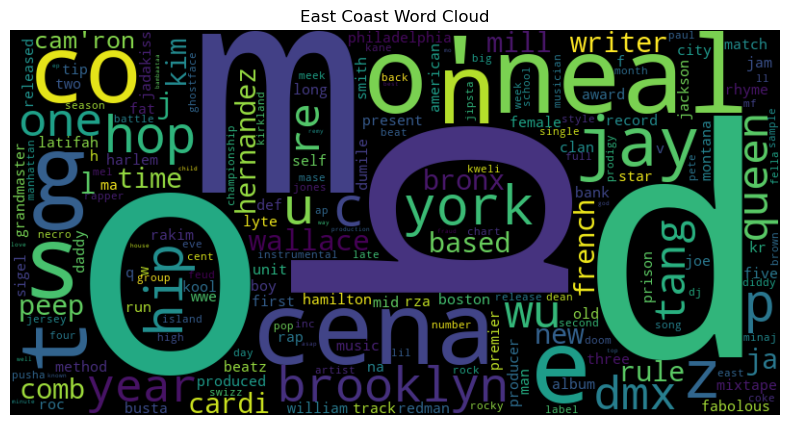

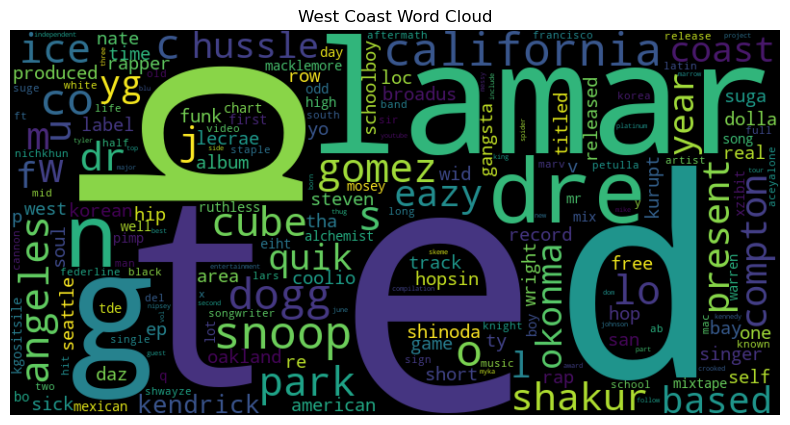

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

multiplier = 100

def generate_wordcloud_string(tf_tr_list):
    wordcloud_string = ""

    for word, score in tf_tr_list:
        # Use the multiplier as described above
        repeat_count = math.ceil(score * multiplier)
        
        # Repeat each word by the times of its score
        wordcloud_string += (word + " ") * repeat_count
    return wordcloud_string

def create_wordcloud(tf_tr_list, title):
    # Get the word cloud string for the list
    wordcloud_string = generate_wordcloud_string(tf_tr_list)

    # Create the word cloud object. 
    # We are not looking for word pairs here, so collocations = false disables that feature.
    wordcloud = WordCloud(collocations=False, width=800, height=400).generate(wordcloud_string)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')

# Generate word clouds
create_wordcloud(east_coast_tf_tr_list, "East Coast Word Cloud")
create_wordcloud(west_coast_tf_tr_list, "West Coast Word Cloud")

> **📊 Graph**: East and West Coast word graphs. Singular letters can be seen in large due to the presence of name pairs, such as "Jay-Z", "Becky G", "Cardi B" and others.

> * For each coast, what are the 5 words with the highest TR scores? Comment on your result.

In [52]:
def highest_tr(prefix, list):
    # Convert each item to a string in the desired format
    formatted_items = ["> 1. **{}:** {}".format(k, round(float(v), 2)) for k, v in list[:5]]

    # Join the string items with a newline character to create a single string
    formatted_string = "\n".join(formatted_items)

    # Print the list with an explaining prefix
    printmd(prefix + "\n" + formatted_string)

highest_tr("> **✅ Solution**: East Coast words with highest TR scores, in the format `word: rounded score`", east_coast_tf_tr_list)
highest_tr("> **✅ Solution**: West Coast words with highest TR scores, in the format `word: rounded score`", west_coast_tf_tr_list)

> **✅ Solution**: East Coast words with highest TR scores, in the format `word: rounded score`
> 1. **o'neal:** 5.57
> 1. **cena:** 5.19
> 1. **york:** 3.94
> 1. **jay-z:** 3.58
> 1. **brooklyn:** 3.5

> **✅ Solution**: West Coast words with highest TR scores, in the format `word: rounded score`
> 1. **lamar:** 6.18
> 1. **dre:** 5.72
> 1. **e-40:** 5.23
> 1. **snoop:** 5.16
> 1. **california:** 5.07

> **💬 Comment**: Observations from the solutions:
> - Location names _California_, _Brooklyn_ and _[New] York_ are listed
> - East Coast's top 5 has two words over the score of five and others below the score of four 
> - West Coast's top 5 consists of only words that score five or higher, with one of them being over six
> - On the list, only _E-40_ and _Jay-Z_ are individual rapper names, and both contain punctuation (a dash). Others are compounds that are missing the second word (e.g. _Snoop Dogg_).

# Part 3: Communities

Find communities and their modularity (from lecture 7).

Here's what you need to do:


 * In your own words, explain what the measure "modularity" is, and the intuition behind the formula you use to compute it. 


> **✅ Solution**: 

* Find communities in the network

In [63]:
import community as community_louvain

rap_graph = UNDIRECTED_GRAPH 
partition = community_louvain.best_partition(rap_graph)

* ...and explain how you chose to identify the communities: Which algorithm did you use and how does it work?


> **✅ Solution**: 

* Comment on your results:
    * How many communities did you find in total?


In [64]:
printmd(f"> **✅ Solution**: Number of communities: {max(partition.values()) + 1}")

> **✅ Solution**: Number of communities: 7

   * Compute the value of modularity with the partition created by the algorithm.


In [65]:
modularity_value = community_louvain.modularity(partition, rap_graph)

printmd(f"> **✅ Solution**: Modularity: {modularity_value:.3f}")

> **✅ Solution**: Modularity: 0.412

>   * Plot and/or print the distribution of community sizes (whichever makes most sense). Comment on your result.


In [10]:
import matplotlib.pyplot as plt
from collections import Counter
### TODO PROBABLY BETTER TO HAVE THIS ON TOP OF THE DOC
def create_histogram(data, title, xlabel, ylabel, color='blue', figuresize= (10, 6)):
    counter = Counter(data)
    labels = list(counter.keys())
    values = list(counter.values())

    plt.figure(figsize=figuresize)
    plt.bar(labels, values, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

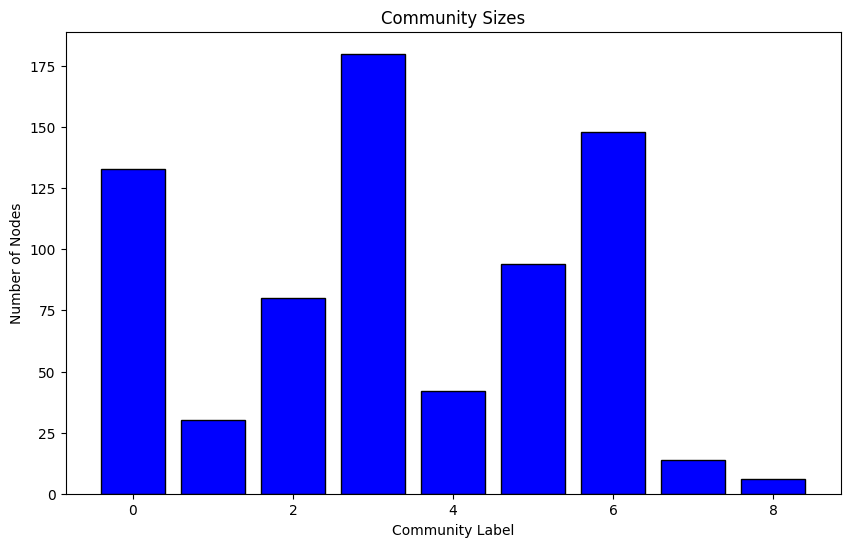

In [11]:
community_labels = list(partition.values())

create_histogram(community_labels, 'Community Sizes', 'Community Label', 'Number of Nodes')

> **📊 Graph**:

> * Now, partition your rappers into two communities based on which coast they represent.
>   * What is the modularity of this partition? Comment on the result.

In [67]:
def calculate_modularity(graph: nx.Graph):
    L = graph.number_of_edges()
    communities = ["west", "east"]
    
    communities_nodes =[]
    for community in communities:
        communities_nodes.append([n for n, attr in graph.nodes(data=True) if attr['coast'] == community])
    
    return nx.community.modularity(graph, communities_nodes)


modularity = calculate_modularity(rap_graph)
printmd(f"> **✅ Solution**: The modularity of the partition is: {modularity:.3f}")

> **✅ Solution**: The modularity of the partition is: 0.250

> **💬 Comment**:  Modularity of the coast partition is smaller than the modularity of the best partition. #TODO Add more description 

# Part 4: Sentiment of communities

Analyze the sentiment of communities (lecture 8). More tips & tricks can be found, if you take a look at Lecture 8's exercises.

A couple of additional instructions you will need below:
* Average the average sentiment of the nodes in each community to find a community-level sentiment.

Here's what you need to do (use the LabMT wordlist approach):


* Calculate and store sentiment for every rapper


In [72]:
labmt_dict = {}
with open('../lectures/data/labMIT-1.0.txt', 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:  # Skipping header line
        parts = line.strip().split('\t')
        word = parts[0]
        score = float(parts[2])
        labmt_dict[word] = score

def calculate_sentiment(tokens):
    total_score = 0
    num_tokens = 0
    
    for token in tokens:
        if token in labmt_dict:
            total_score += labmt_dict[token]
            num_tokens += 1
            
    if num_tokens == 0:
        return 0
    
    return total_score / num_tokens

In [73]:
import re
ROOT_FOLDER = "../lectures/data/"

def tokenize_text(text):
    return re.findall(r'\b\w+\b', text.lower())

def read_text_from_file(filename):
    try:
        with open(filename, "r", encoding="utf-8") as f:
            return f.read()
    except Exception as e:
        print(f"An error occurred while processing the file {filename}")
        return None

def extract_filename_from_name(rap_name, root_folder, coast):
    safe_name = rap_name.replace("?", "%3F")
    filename = f"{root_folder}{coast}/{safe_name}.txt"
    return filename

def add_sentiment_to_nodes(net, root_folder):
    coast_path_dictionary={
        "east": "east_coast",
        "west": "west_coast"
    } 
    for node, attrs in net.nodes(data=True):
        coast = coast_path_dictionary[attrs['coast']]
        filename = extract_filename_from_name(node, root_folder, coast)
        
        text = read_text_from_file(filename)
        if text is None:
            continue

        tokens = tokenize_text(text)
        sentiment = calculate_sentiment(tokens)
        
        net.nodes[node]['sentiment'] = sentiment


rap_graph_with_sentiment = DIRECTED_GRAPH.copy()
add_sentiment_to_nodes(rap_graph_with_sentiment, ROOT_FOLDER)

* Create a histogram of all rappers' associated sentiments.


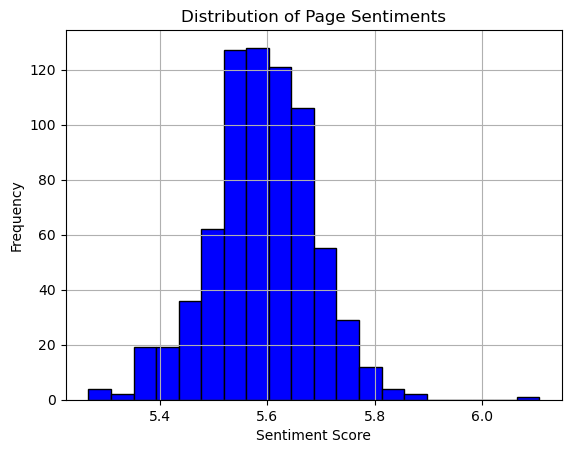

In [74]:
sentiments = [attrs['sentiment'] for _, attrs in rap_graph_with_sentiment.nodes(data=True)]

    
plt.hist(sentiments, bins=20, color='blue', edgecolor='black')

plt.title("Distribution of Page Sentiments")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(True)

* What are the 10 rappers with happiest and saddest pages?


In [75]:
def top_and_bottom_rappers_by_sentiment(net):
    sorted_rappers = sorted(net.nodes(data=True), key=lambda x: x[1]['sentiment'])
    
    bottom_10 = sorted_rappers[:10]
    top_10 = sorted_rappers[-10:]
    
    print("10 Rappers with the Saddest Pages:")
    for i, (rapper, attrs) in enumerate(bottom_10, 1):
        print(f"{i}. {rapper} (Sentiment: {attrs['sentiment']:.2f})")

    print("\n10 Rappers with the Happiest Pages:")
    for i, (rapper, attrs) in enumerate(reversed(top_10), 1):
        print(f"{i}. {rapper} (Sentiment: {attrs['sentiment']:.2f})")
        
top_and_bottom_rappers_by_sentiment(rap_graph_with_sentiment)

10 Rappers with the Saddest Pages:
1. Slip Capone (Sentiment: 5.27)
2. Slow Pain (Sentiment: 5.27)
3. Ol' Dirty Bastard (Sentiment: 5.28)
4. Droop-E (Sentiment: 5.29)
5. Knightowl (Sentiment: 5.32)
6. Killa Sin (Sentiment: 5.34)
7. Sir Jinx (Sentiment: 5.35)
8. Rydah J. Klyde (Sentiment: 5.36)
9. Black Rob (Sentiment: 5.36)
10. The Jacka (Sentiment: 5.36)

10 Rappers with the Happiest Pages:
1. Phil Da Agony (Sentiment: 6.11)
2. Young Music DYMG (Sentiment: 5.89)
3. Skizzy Mars (Sentiment: 5.85)
4. Dave Free (Sentiment: 5.84)
5. Lamiere (Sentiment: 5.83)
6. Jay Critch (Sentiment: 5.83)
7. V. Rose (Sentiment: 5.83)
8. Mark Batson (Sentiment: 5.81)
9. Omega Crosby (Sentiment: 5.80)
10. Futuristic (rapper) (Sentiment: 5.80)



Now, compute the sentiment of each coast: 
* Which is the happiest and which is saddest coast according to the LabMT wordlist approach? (Take the coast's sentiment to be the average sentiment of the coast's rappers' pages (disregarding any rappers with sentiment 0).


In [86]:
import numpy as np
def sentiment_mean_for_coast(net, coast):
    sentiments = [attrs['sentiment'] for _, attrs in net.nodes(data=True) if attrs["coast"] == coast]
    return np.mean(sentiments)

east_coast_sentiment = sentiment_mean_for_coast(rap_graph_with_sentiment, "east")
west_coast_sentiment = sentiment_mean_for_coast(rap_graph_with_sentiment, "west")

# Determine happiest and saddest coasts
if east_coast_sentiment is not None and west_coast_sentiment is not None:
    if east_coast_sentiment > west_coast_sentiment:
        happiest_coast = "East"
        saddest_coast = "West"
    elif west_coast_sentiment > east_coast_sentiment:
        happiest_coast = "West"
        saddest_coast = "East"
    else:
        happiest_coast = saddest_coast = "Both coasts have the same sentiment."

    printmd(f"> **✅ Solution**: The happiest coast is **{happiest_coast}** with an average sentiment of **{max(east_coast_sentiment, west_coast_sentiment):.3f}**.")
    printmd(f"> **✅ Solution**: The saddest coast is **{saddest_coast}** with an average sentiment of **{min(east_coast_sentiment, west_coast_sentiment):.3f}**.")
else:
    printmd("❌ Unable to compute sentiment for one or both coasts.")



> **✅ Solution**: The happiest coast is **West** with an average sentiment of **5.592**.

> **✅ Solution**: The saddest coast is **East** with an average sentiment of **5.590**.

* Use the "label shuffling test" (Week 5 and 8) to test if the coast with the highest wikipedia page sentiment has a page sentiment that is significantly higher (5% confidence bound) than a randomly selected group of rappers of the same size.


In [85]:
import random
random.seed(SEED)

def label_shuffling_test(rap_network, happiest_coast):
    coast_sentiments = [attrs['sentiment'] for n, attrs in rap_network.nodes(data=True) if attrs['coast'].lower() == happiest_coast.lower() and attrs['sentiment'] != 0]
    all_sentiments = [attrs['sentiment'] for n, attrs in rap_network.nodes(data=True) if attrs['sentiment'] != 0]

    actual_coast_mean = np.mean(coast_sentiments)

    num_trials = 1000
    fake_means = []

    for _ in range(num_trials):
        random.shuffle(all_sentiments)
        fake_coast_mean = np.mean(all_sentiments[:len(coast_sentiments)])
        fake_means.append(fake_coast_mean)

    higher_than_random = len([x for x in fake_means if actual_coast_mean > x])

    p_value_higher = higher_than_random / num_trials

    printmd(f"> **✅ Solution**: Actual mean sentiment of **{happiest_coast.capitalize()} Coast** pages: **{actual_coast_mean:.2f}**")
    printmd(f"> **✅ Solution**: The Actual mean was higher than random in: **{p_value_higher*100}%** of cases")

    # Conclusion based on a 5% significance level
    if p_value_higher >= 0.95:
        printmd("> **✅ Solution**:  Proved the hypothesis that {happiest_coast} have sentiment significantly higher than random group.")
    else:
        printmd(f"> ❌ Failed to prove the hypothesis that {happiest_coast} coast have sentiment significantly higher than random group.")

# Example usage assuming `rap_graph_with_sentiment` is your network and the happiest coast is "West"
label_shuffling_test(rap_graph_with_sentiment, happiest_coast)

> **✅ Solution**: Actual mean sentiment of **West Coast** pages: **5.59**

> **✅ Solution**: The Actual mean was higher than random in: **62.4%** of cases

> ❌ Failed to prove the hypothesis that West coast have sentiment significantly higher than random group.


* Does the result make sense to you? Elaborate.


> **✅ Solution**: #TODO modify.  To be honest I would like to see some more diverse results but i think due to style in which the wikipedia pages are written the mean sentiment will be around neutral 